 # Exercise 1: Solving a 2D motion planning problem by PRM
 http://www.osrobotics.org/osr/planning/path_planning.html

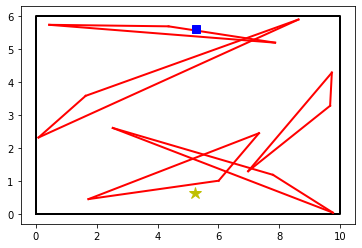

In [34]:
#inporting environment
import numpy as np
import pylab as pl
import sys
sys.path.append('osr_examples/scripts/')
import environment_2d
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

In [35]:
#sample space for recording nodes
samplex = []
sampley = []
sample = []

#distance betweem point
r = 0.1

#current location
currentx = None
currenty = None

sample.append((x_start, y_start))
sample.append((x_goal, y_goal))


In [36]:
from math import dist
#generate random node across the map
nodeNum = 55000
num = 0
while (num<nodeNum):
    tempx = 10*np.random.rand()
    tempy = 6*np.random.rand()
    if env.check_collision(tempx, tempy) == False and (tempx, tempy) not in sample: #make sure no repeat nodes
        num += 1
        samplex.append(tempx)
        sampley.append(tempy)
        sample.append((tempx, tempy))

#createlist for next visit and put start point as first visit node
nextvisit = [(x_start, y_start)]

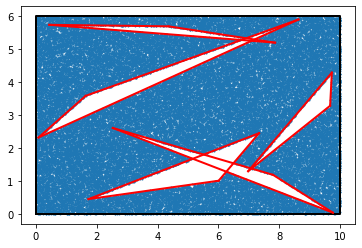

In [37]:
#view generated nodes on plot
import matplotlib.pyplot as plt

plt.scatter(samplex, sampley, s=1)
env.plot()

In [38]:
#make a sample space copy 
sampletemp = sample.copy()

#create parentnode list for tracking
parentsOf={}

loops = 0 #for monitor loop

while(len(nextvisit)!=0 and (currentx, currenty) != (x_goal, y_goal)):
    
    currentx, currenty = nextvisit[0]
    nextvisit.pop(0)
    sampletemp.remove((currentx, currenty)) #remove visited node from sample
    
    if(dist((x_goal, y_goal), (currentx, currenty)) < r): #if goal is reachable from current postiion, reach it and break
        parentsOf[(x_goal, y_goal)] = (currentx, currenty)
        (currentx, currenty) = (x_goal, y_goal)
        break
    
    for tempx, tempy in sampletemp: #mark every node within r and not visited as nextvisit
        thisnode = (tempx, tempy)
        if dist((tempx, tempy), (currentx, currenty)) < r and thisnode not in nextvisit:
            parentsOf[(tempx, tempy)] = (currentx, currenty)
            nextvisit.append(thisnode)
    
    loops += 1
    if(loops % 100 == 0):
        print(loops)

if(len(nextvisit) == 0 and (currentx, currenty) != (x_goal, y_goal)): # if goal not reachable 
    print("There is no way")
elif((currentx, currenty) == (x_goal, y_goal)): # if reached goal
    print("Congrats!")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [39]:
#check state
print(x_start, y_start)
print (currentx, currenty)
print(x_goal, y_goal)

5.279088234179204 5.625429503705652
5.21696122444958 0.6491602973233841
5.21696122444958 0.6491602973233841


(5.118765204907625, 0.6597572567947507)


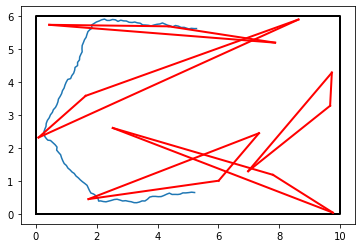

In [40]:
#create route for visual
routex = []
routey = []

#start from goal and backtrack to start with parentsnode list
tempx = x_goal
tempy = y_goal
print(parentsOf[(tempx, tempy)]) 
while((tempx, tempy) != (x_start, y_start)):
    routex.append(tempx)
    routey.append(tempy)
    (tempx, tempy) = parentsOf[(tempx, tempy)]
routex.append(tempx)
routey.append(tempy)

plt.plot(routex, routey)
env.plot()

# Exercise 2: Post-processing a 2D path
https://osrobotics.org/osr/planning/post_processing.html 

The node decreased from 147 to 7
The distance dereased from 14.600000000000001 to 12.91705270891858


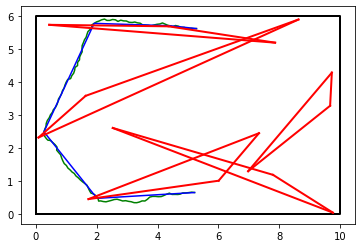

In [41]:
#make a copy of parentsnode
improvedParentsOf = parentsOf
testroute = list(zip(routex, routey))
#print(len(testroute))

impRouteX = []
impRouteY = []

impRouteX.append(x_goal)
impRouteY.append(y_goal)

x = x_goal #also start from goal of route
y = y_goal
idx = 0
while((x,y) != (x_start, y_start)):
    if(idx == len(testroute) - 1):
        break
    #print(idx)
    
    stp = 1
    collision = 0
    while collision == 0:
        for n in range(0, np.floor(dist(testroute[idx+stp], (x, y))/r).astype(np.int64)):
            #print(n)
            testx = (testroute[idx+stp][0] - x) * r / dist(testroute[idx+stp], (x, y)) * n + x #segment the line to line segments of length r and check each points 
            testy = (testroute[idx+stp][1] - y) * r / dist(testroute[idx+stp], (x, y)) * n + y
            if(env.check_collision(testx,testy)):
                collision = 1
                break
        if collision == 0: #if no collision update parentnode
            improvedParentsOf[(x,y)] = testroute[idx+stp]
            if(idx+stp >= len(testroute)-1): #if reached last node, append improved route with current node and end the loop
                idx = idx+stp
                x, y = testroute[idx]
                impRouteX.append(x)
                impRouteY.append(y)
                break
            stp += 1 #if not reached last node, go to next node
        elif(collision == 1): #if collision occurs, append improved route with last node
            #print("change = " + str(idx) + " " + str(stp))
            idx = idx + stp - 1
            x, y = testroute[idx]
            impRouteX.append(x)
            impRouteY.append(y)

#calculate distance
impDistance = 0
impRoute = list(zip(impRouteX, impRouteY))
index = 0
while(index < len(impRoute)-1):
    impDistance += dist(impRoute[index], impRoute[index+1])
    index += 1

print("The node decreased from " + str(len(routex)) + " to " + str(len(impRouteX)))
print("The distance dereased from " + str((len(routex)-1)*0.1) + " to " + str(impDistance))
plt.plot(routex, routey, color = "green")
plt.plot(impRouteX, impRouteY, color = "blue")
env.plot()